In [2]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
# Average Trip Duration per Rider
#Only look at 2019
January_2019 = "../data/201901-citibike-tripdata.csv"
February_2019 = "../data/201902-citibike-tripdata.csv"
March_2019 = "../data/201903-citibike-tripdata.csv"
April_2019 = "../data/201904-citibike-tripdata.csv"
May_2019 = "../data/201905-citibike-tripdata.csv"
June_2019 = "../data/201906-citibike-tripdata.csv"
July_2019 = "../data/201907-citibike-tripdata.csv"
August_2019 = "../data/201908-citibike-tripdata.csv"
September_2019 = "../data/201909-citibike-tripdata.csv"
October_2019 = "../data/201910-citibike-tripdata.csv"
November_2019 = "../data/201911-citibike-tripdata.csv"
December_2019 = "../data/201912-citibike-tripdata.csv"

In [4]:
# Read the .csv files into the Notebook
Jan2019_df = pd.read_csv(January_2019)
Feb2019_df = pd.read_csv(February_2019)
Mar2019_df = pd.read_csv(March_2019)
Apr2019_df = pd.read_csv(April_2019)
May2019_df = pd.read_csv(May_2019)
Jun2019_df = pd.read_csv(June_2019)
Jul2019_df = pd.read_csv(July_2019)
Aug2019_df = pd.read_csv(August_2019)
Sep2019_df = pd.read_csv(September_2019)
Oct2019_df = pd.read_csv(October_2019)
Nov2019_df = pd.read_csv(November_2019)
Dec2019_df = pd.read_csv(December_2019)


In [5]:
Year_Agg = pd.concat([Jan2019_df, Feb2019_df, Mar2019_df, Apr2019_df, May2019_df, Jun2019_df, Jul2019_df, Aug2019_df, Sep2019_df, Oct2019_df, Nov2019_df, Dec2019_df], ignore_index = True)
Year_Agg

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,320,2019-01-01 00:01:47.4010,2019-01-01 00:07:07.5810,3160.0,Central Park West & W 76 St,40.778968,-73.973747,3283.0,W 89 St & Columbus Ave,40.788221,-73.970416,15839,Subscriber,1971,1
1,316,2019-01-01 00:04:43.7360,2019-01-01 00:10:00.6080,519.0,Pershing Square North,40.751873,-73.977706,518.0,E 39 St & 2 Ave,40.747804,-73.973442,32723,Subscriber,1964,1
2,591,2019-01-01 00:06:03.9970,2019-01-01 00:15:55.4380,3171.0,Amsterdam Ave & W 82 St,40.785247,-73.976673,3154.0,E 77 St & 3 Ave,40.773142,-73.958562,27451,Subscriber,1987,1
3,2719,2019-01-01 00:07:03.5450,2019-01-01 00:52:22.6500,504.0,1 Ave & E 16 St,40.732219,-73.981656,3709.0,W 15 St & 6 Ave,40.738046,-73.996430,21579,Subscriber,1990,1
4,303,2019-01-01 00:07:35.9450,2019-01-01 00:12:39.5020,229.0,Great Jones St,40.727434,-73.993790,503.0,E 20 St & Park Ave,40.738274,-73.987520,35379,Subscriber,1979,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20551692,93,2019-12-31 23:58:18.0160,2019-12-31 23:59:51.6360,3141.0,1 Ave & E 68 St,40.765005,-73.958185,3142.0,1 Ave & E 62 St,40.761227,-73.960940,28734,Subscriber,1985,2
20551693,786,2019-12-31 23:58:59.8960,2020-01-01 00:12:06.3460,490.0,8 Ave & W 33 St,40.751551,-73.993934,513.0,W 56 St & 10 Ave,40.768254,-73.988639,41418,Subscriber,1991,1
20551694,351,2019-12-31 23:59:03.6950,2020-01-01 00:04:54.8730,3349.0,Grand Army Plaza & Plaza St West,40.672968,-73.970880,3368.0,5 Ave & 3 St,40.672816,-73.983524,27746,Subscriber,1935,2
20551695,1571,2019-12-31 23:59:21.3610,2020-01-01 00:25:32.9420,252.0,MacDougal St & Washington Sq,40.732264,-73.998522,366.0,Clinton Ave & Myrtle Ave,40.693261,-73.968896,28506,Subscriber,1980,1


In [6]:
trip_duration_df = Year_Agg['tripduration']
bikeid_df = Year_Agg['bikeid']
TDBID = pd.DataFrame(trip_duration_df, bikeid_df)
TDBID

,tripduration
bikeid,
15839,337
32723,464
27451,484
21579,394
35379,513
...,...
28734,574
41418,697
27746,715


In [14]:
# grouping 2019 data by 'bikeid' and 'tripduration'
bike_groups = TDBID.groupby(['bikeid'])
bike_group_mean_df = bike_groups.mean()
bike_group_mean_df

,tripduration
bikeid,
14529,1912
14530,2190
14531,262
14532,185
14533,111
...,...
42044,334
42045,525
42046,188


In [15]:
bike_group_sum_df = bike_groups.sum()
bike_group_sum_df

,tripduration
bikeid,
14529,1290600
14530,2080500
14531,184710
14532,2035
14533,96792
...,...
42044,221442
42045,299250
42046,115432


In [20]:
bike_subset_df = bike_group_sum_df.sample(90)
bike_subset_df

,tripduration
bikeid,
34406,699300
16706,1585968
26441,950400
31786,962880
35898,51824
...,...
26995,221130
35667,4329003
38621,418080


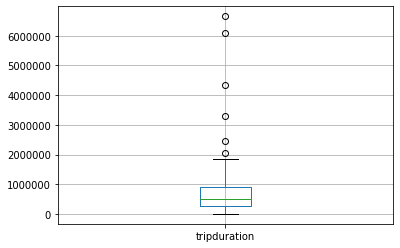

In [21]:
bike_subset_df.boxplot()

In [22]:
# Represent Data
bike_subset_df.describe()



,tripduration
count,9.000000e+01
mean,8.003780e+05
std,1.091852e+06
min,5.140000e+02
25%,2.520210e+05
50%,4.961965e+05
75%,9.060205e+05
max,6.657005e+06


In [ ]:
# Average trip duration by 